In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import scipy.stats as stats

plt.style.use('science')

In [2]:
dbl = pd.read_csv('podwojna.csv')
dbl.head()

,x,I
0,-5.7,0.02
1,-5.6,0.02
2,-5.5,0.02
3,-5.4,0.01
4,-5.3,0.02


In [3]:
sing = pd.read_csv('singular.csv')
sing = sing[sing['x'] <= 7]
sing.head()

,x,I
0,-7.0,0.05
1,-6.8,0.04
2,-6.6,0.03
3,-6.4,0.02
4,-6.2,0.03


Text(0, 0.5, '$I [\\text{j.u.}])$')

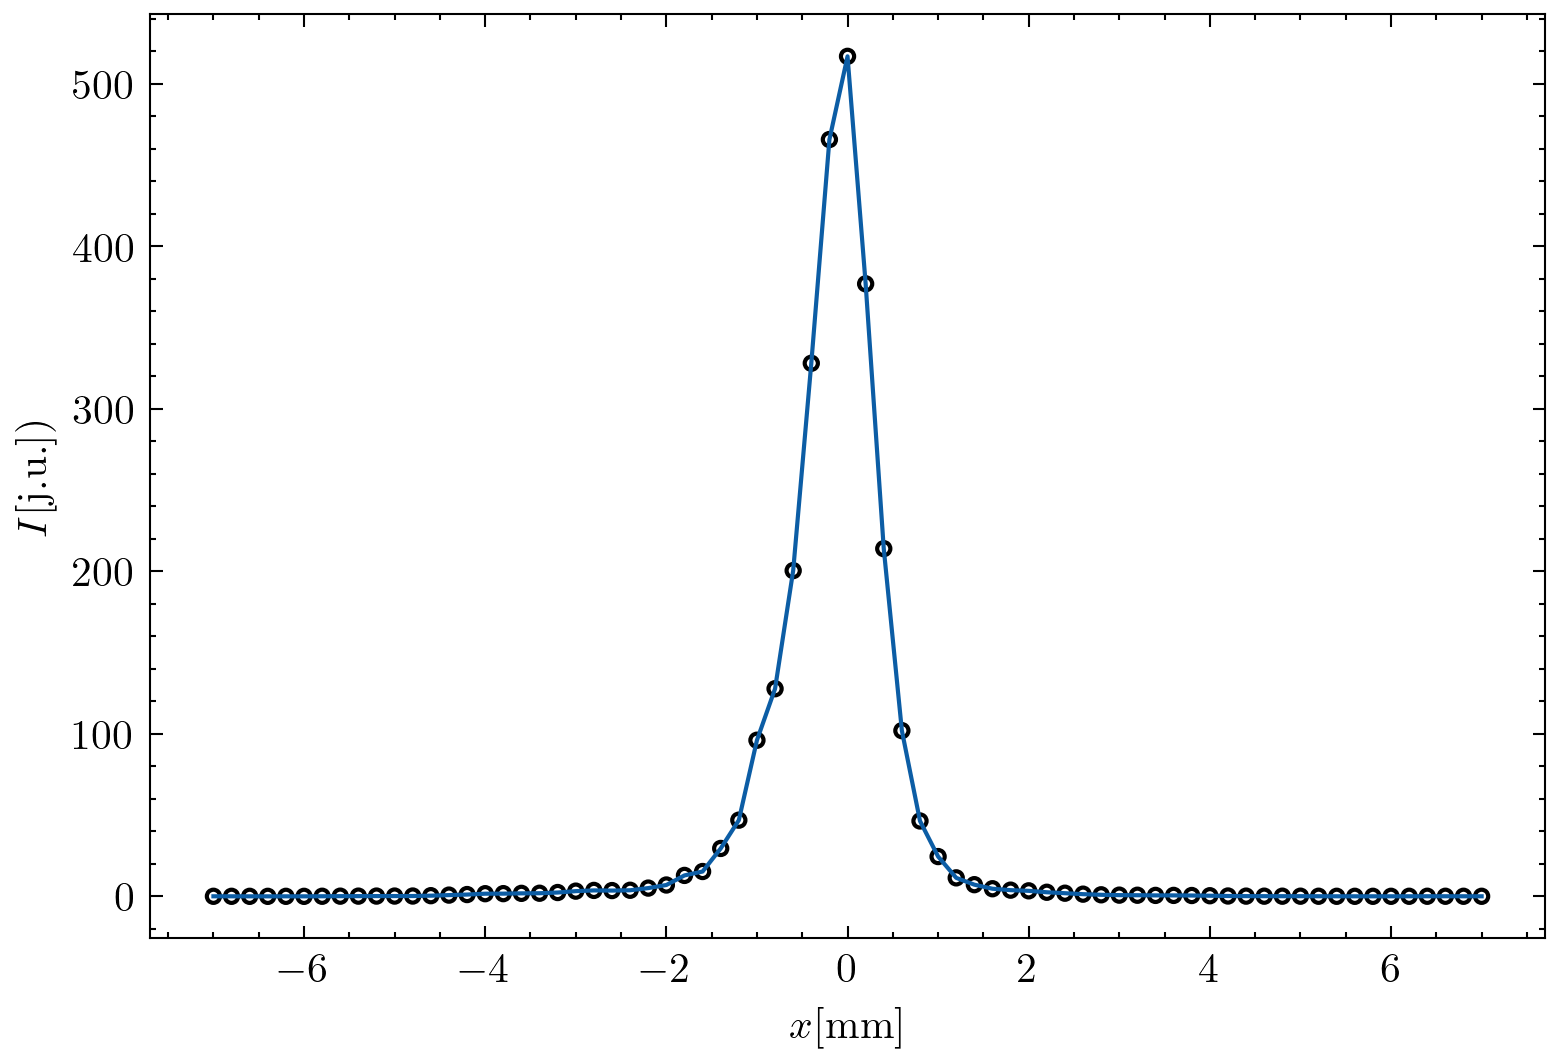

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
ax.scatter(sing['x'], sing['I'], 10, color='black', facecolors='none')

ax.plot(sing['x'], sing['I'])

ax.set_xlabel(r'$x [\text{mm}]$')
ax.set_ylabel(r'$I [\text{j.u.}])$')


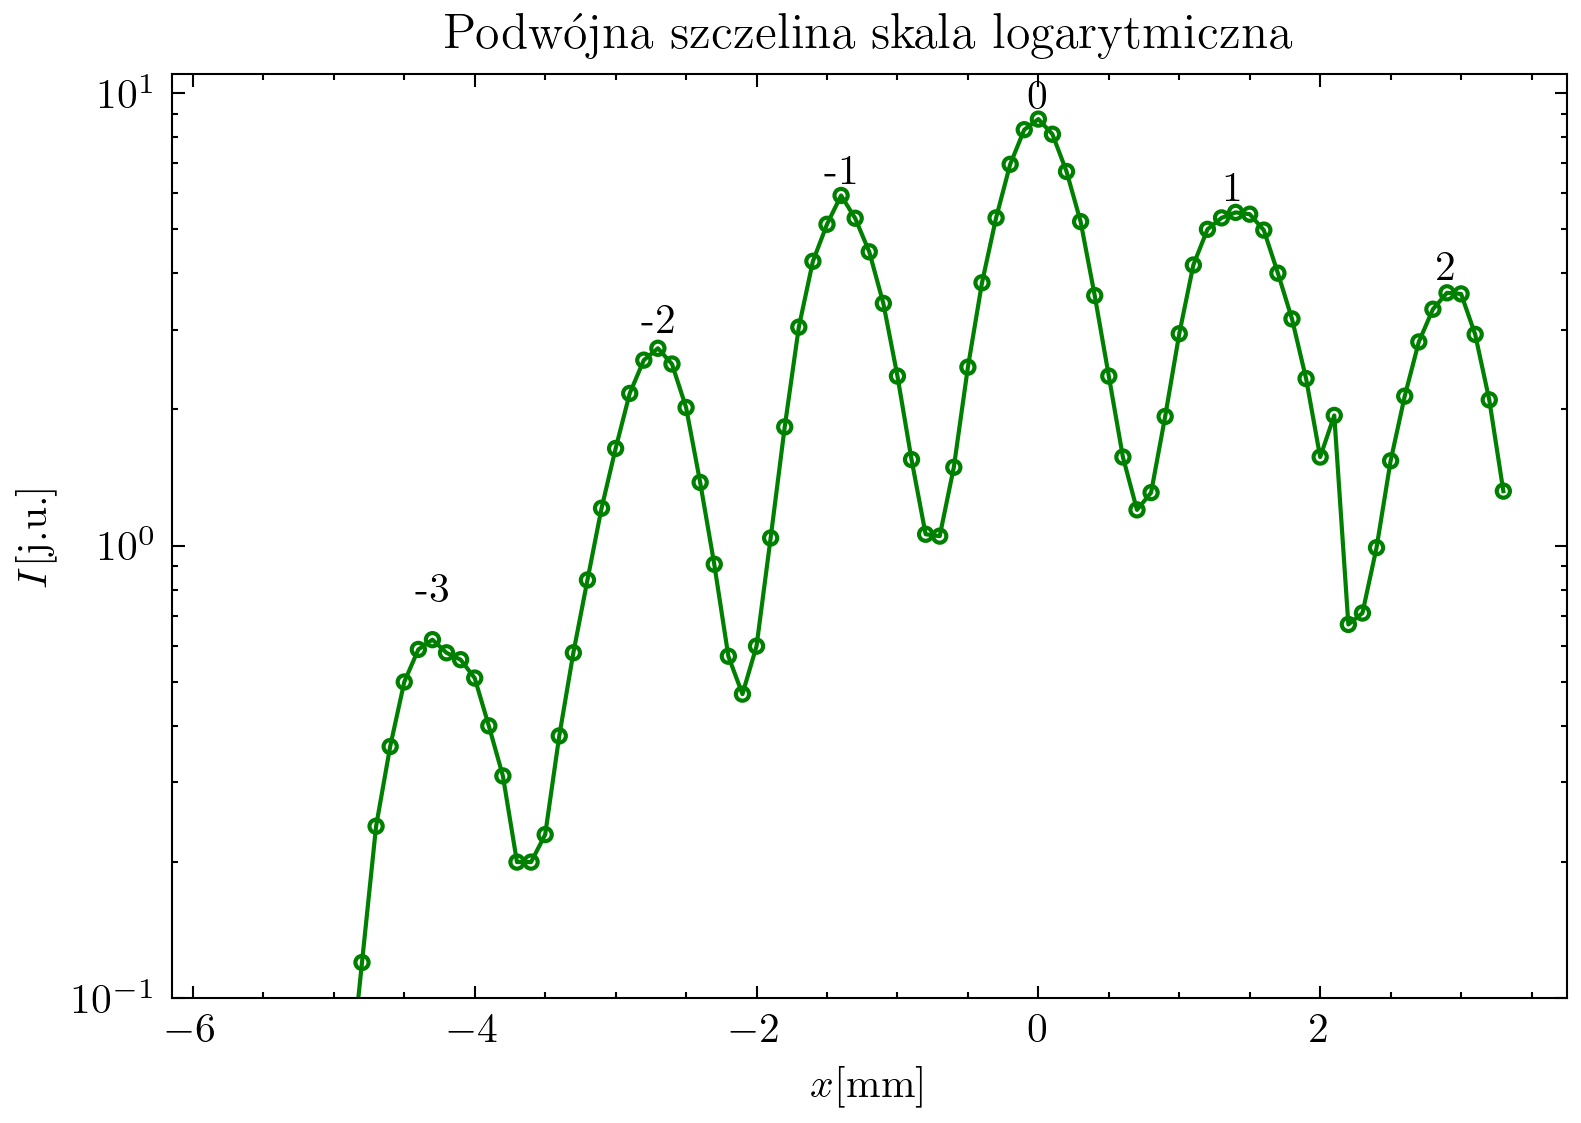

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
ax.scatter(dbl['x'], dbl['I'], 10, color='green', facecolors='none')

ax.plot(dbl['x'], dbl['I'], color='green')

ax.set_xlabel(r'$x [\text{mm}]$')
ax.set_ylabel(r'$I [\text{j.u.}]$')

maxes = [
    (-1.4, 5.94, -1),
    (-2.7, 2.73, -2),
    (-4.3,0.62, -3),
    (1.4, 5.45, 1),
    (0, 8.76, 0),
    (2.9, 3.62, 2),
]

ax.set_title("Podwójna szczelina skala logarytmiczna")
ax.set_yscale('log')
ax.set_ylim(0.1, 11)
# add labels to all points
for (xi, yi, m) in maxes:
    plt.text(xi, yi + 0.1 , m, va='bottom', ha='center')

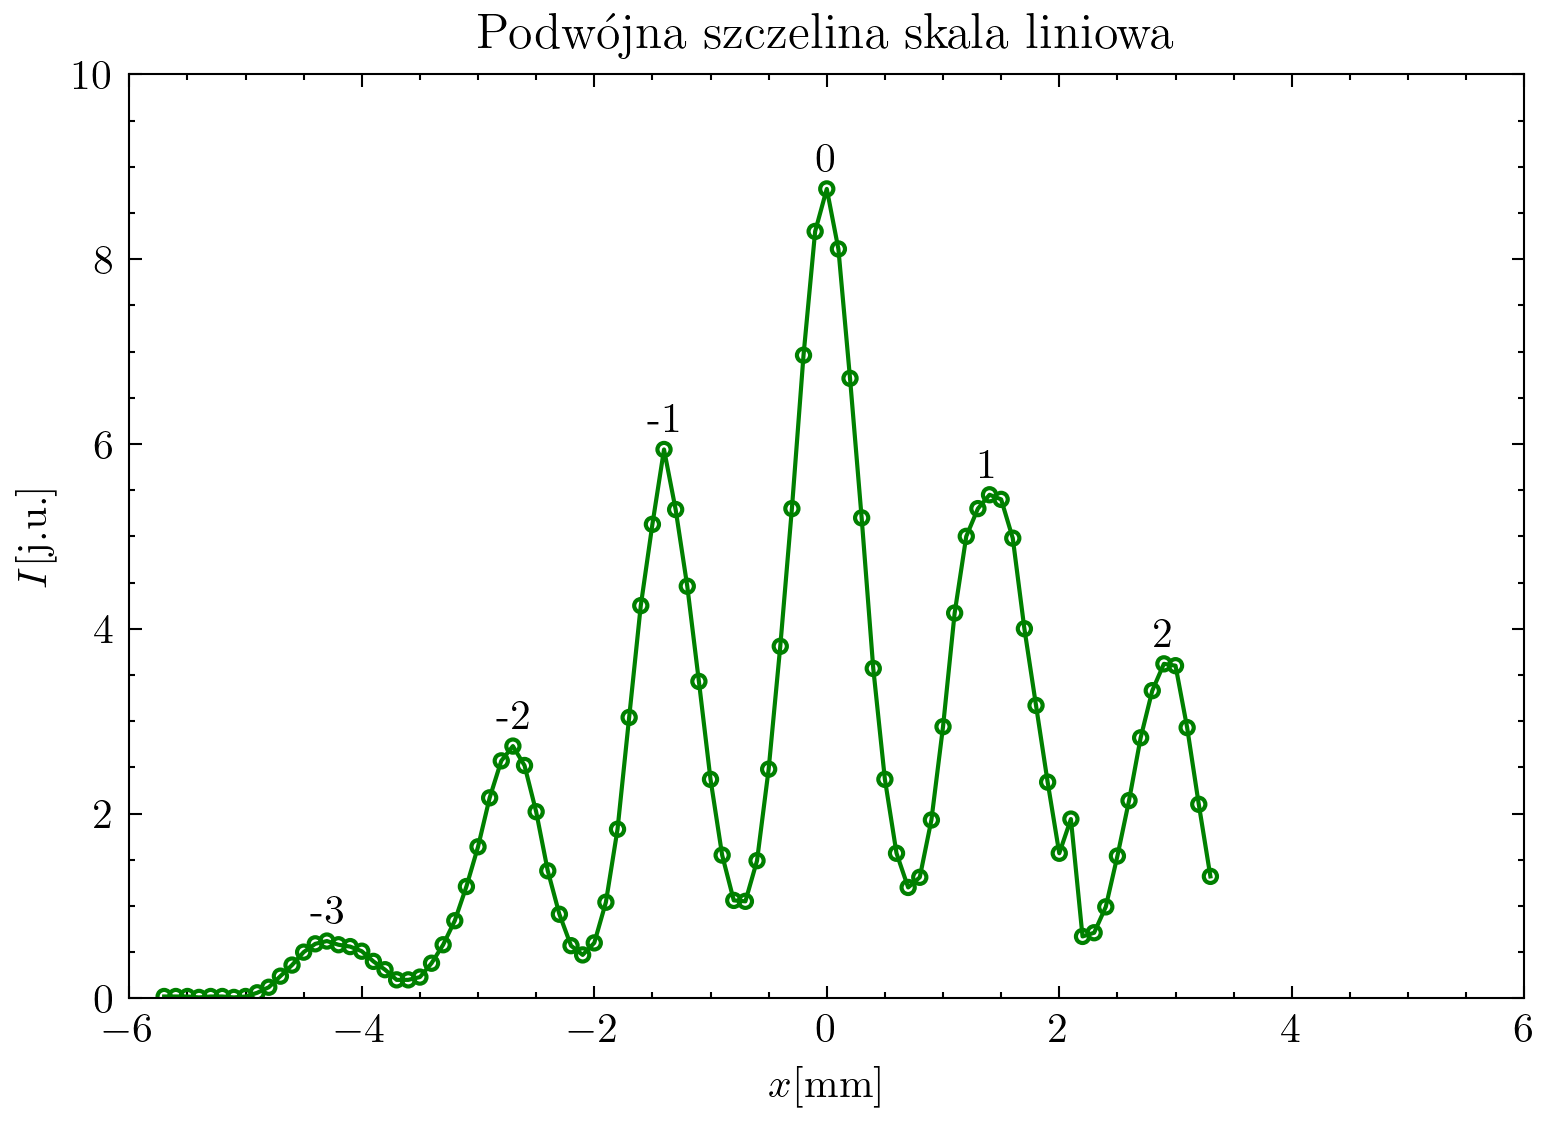

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
ax.scatter(dbl['x'], dbl['I'], 10, color='green', facecolors='none')

ax.plot(dbl['x'], dbl['I'], color='green')

ax.set_xlabel(r'$x [\text{mm}]$')
ax.set_ylabel(r'$I [\text{j.u.}]$')

maxes = [
    (-1.4, 5.94, -1),
    (-2.7, 2.73, -2),
    (-4.3,0.62, -3),
    (1.4, 5.45, 1),
    (0, 8.76, 0),
    (2.9, 3.62, 2),
]

ax.set_ylim(0, 10)
ax.set_xlim(-6,6)
ax.set_title("Podwójna szczelina skala liniowa")

for (xi, yi, m) in maxes:
    plt.text(xi, yi + 0.1 , m, va='bottom', ha='center')

In [7]:
3*650*673/4.3 / 1000

values = [1.4, 2.8, 4.3]
ds = [ round((i+1)*650*673/x/1000,4) for i, x in enumerate(values)]
print(ds)

dbar = sum(ds)/len(ds)
print(dbar)

udbar = np.sqrt(
    sum((d-dbar)**2 for d in ds ) / (len(ds)-1)
)
print(udbar)


[312.4643, 312.4643, 305.1977]
310.04209999999995
4.195373466093325


In [8]:
650*1250/5.8 

140086.20689655174

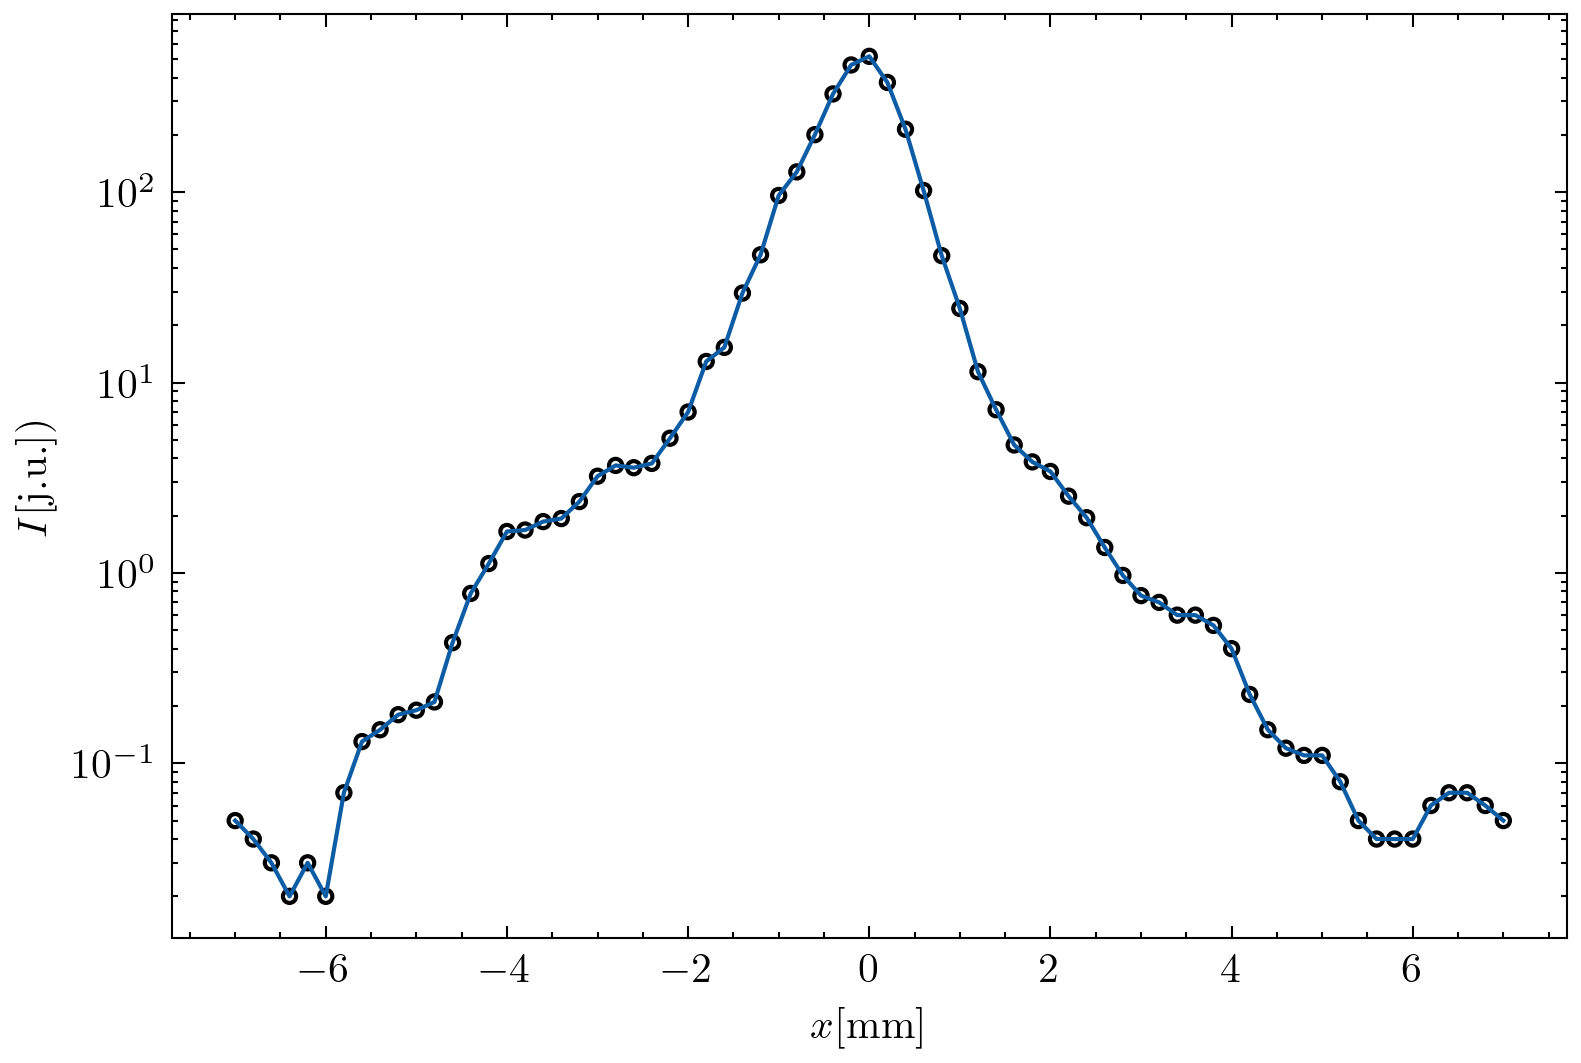

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
ax.scatter(sing['x'], sing['I'], 10, color='black', facecolors='none')

ax.plot(sing['x'], sing['I'])

ax.set_xlabel(r'$x [\text{mm}]$')
ax.set_ylabel(r'$I [\text{j.u.}])$')
ax.set_yscale('log')


In [10]:
1.2/8.76

0.136986301369863

In [11]:
def filter_based_on_neighbours(xs, ys, filter):
    n = len(ys)
    filtered = []
    for i in range(1, n-1):
        left,y, right = ys[i-1],ys[i], ys[i+1]
        if filter(left, y, right):
            filtered.append((xs[i], y))
    return filtered



In [12]:
find_local_maxes = lambda xs, ys: filter_based_on_neighbours(xs,ys, 
            lambda left, y, right:  left < y and y > right)

find_local_mins = lambda xs, ys: filter_based_on_neighbours(xs,ys,
            lambda left, y, right:  left > y  and y < right)

In [13]:
find_local_mins(sing['x'], sing['I'])

[(-6.4, 0.02), (-6.0, 0.02), (-2.6, 3.57)]